# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Q.1. Make an 80/20 train/test split</h3>

In [37]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Q.2. Fit a logistic regression model on the training data</h3>

In [52]:
from sklearn.linear_model import LogisticRegression
log_rgr = LogisticRegression(solver='lbfgs', max_iter=10000)
model_log = log_rgr.fit(X_train, y_train)

<h3> Q.3. Predict the test data</h3>

In [39]:
y_pred = model_log.predict(X_test)

<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

AUC: 0.7303030303030302


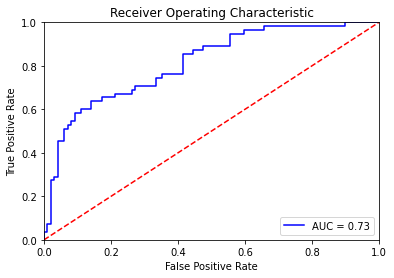

In [40]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) #TODO
roc_auc = metrics.roc_auc_score(y_test, y_pred) #TODO


print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [41]:
#TODO
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
log_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
log_accuracy = accuracy_score(y_test, y_pred)
print("MSE", log_mse)
print("Accuracy", log_accuracy)

MSE 0.2532467532467532
Accuracy 0.7467532467532467


## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

In [42]:
# K-Fold is a strategy where you split up your data set by 'folds' or chunks of data. i.e. if you have 5 folds and 1000
# entries of data, each fold would consist of 200 items. Each fold is then leveraged as the test data set, with the remaining
# 800 entries used as a training set. For example, if 1-200 is the first fold used as the test set, then 201-1000 would be
# used as the training set. Then the next fold would be 201-400 for the test set, and then 1-200 && 401-1000 would be used
# for the training set. This repeats until all 5 folds have been used for testing. The average of the accuracy/errors is usually
# used to determine the overall efficacy of the model.
# However, the above statement is in regards to what I've read online. The powerpoint for week 6 offers a different approach
# from the graph, where you split up the test set before doing the folds, and then fold the training data while keeping the
# test data separate (constant). I think this graph may defeat the purpose of K-fold as it seems to be designed to include the
# test data somehow.

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

In [43]:
from sklearn.model_selection import cross_val_score, KFold

# 5 fold split mean
kfold = KFold(n_splits=5)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(model, X=X, y=y, cv=kfold)
print("5-fold mean", scores.mean())

# 10 fold split mean
kfold = KFold(n_splits=10)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(model, X=X, y=y, cv=kfold)
print("10-fold mean", scores.mean())

5-fold mean 0.770902300314065
10-fold mean 0.7760423786739576


## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

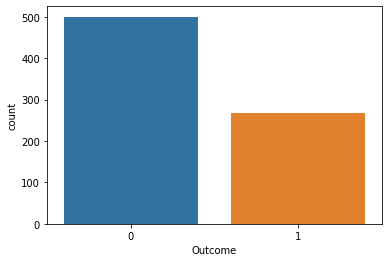

In [44]:
import seaborn as sns
sns.countplot(x='Outcome',data=data)
plt.show()

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [53]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = data[data['Outcome'] == 0]#TODO
minority_class = data[data['Outcome'] == 1]#TODO
 
# Upsample minority class
# Getting counts
count_class_0 = majority_class['Outcome'].count()
# count_class_0, count_class_1 = data[['Outcome']].value_counts()

minority_upsampled = resample(minority_class, replace=True, n_samples=count_class_0, random_state=42)
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 

<h3> Q.9. Display new class counts</h3>

(768, 9)
(1000, 9)


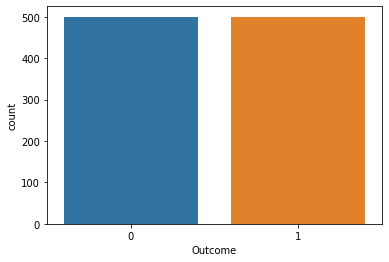

In [46]:
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1
import seaborn as sns
print(data.shape)
print(data_upsampled.shape)
sns.countplot(x='Outcome',data=data_upsampled)
plt.show()

<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

In [50]:
# Separate input features (X) and target variable (y)
u_X = data_upsampled.iloc[:, :-1].values
u_y = data_upsampled.iloc[:, 8].values

#Perform train test split 80/20
u_X_train, u_X_test, u_y_train, u_y_test = train_test_split(u_X, u_y, test_size=0.2, random_state=42)

# Train model
u_log_rgr = LogisticRegression(max_iter=1000, solver='lbfgs')
upsampled_model = u_log_rgr.fit(X=u_X_train, y=u_y_train)
 
# Predict on training set
u_y_pred = upsampled_model.predict(u_X_test)

# How's our accuracy? Has it improved? Comment
score = accuracy_score(y_true=u_y_test, y_pred=u_y_pred)
print("Score", score)
# Compared to the initial logistic regression we performed, the accuracy has improved from 0.746 to 0.775. Compared to the K-fold
# cross-validation, it is better than the 5-fold accuracy (0.771), but slightly worse than the 10-fold accuracy (0.776).

Score 0.775


<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [48]:
# Enter summary here
# I've had some experience with k-fold validation from a 3 hour coursera course I took. I do appreciate how the lectures are
# improving upon one another. I did not encounter any difficulties this time around. Kaggle actually helped a little
# with this one (for splitting the majority and minority classes). I can see how problems could be frustrating since you
# could accidentally re-use variables from previous cells. I think this is applicable to real-world when the majority class
# is drastically different than the minority class, i.e. 100:1 ratio. This example did not really show the profound difference
# in accuracy that kaggle showed, and how removing features did not alter the accuracy score (prior to rebalancing/upsampling).